In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Insel\rchu\Instacart Basket Analysis'

In [3]:
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_custm.pkl'))

### Bar Charts

<AxesSubplot:>

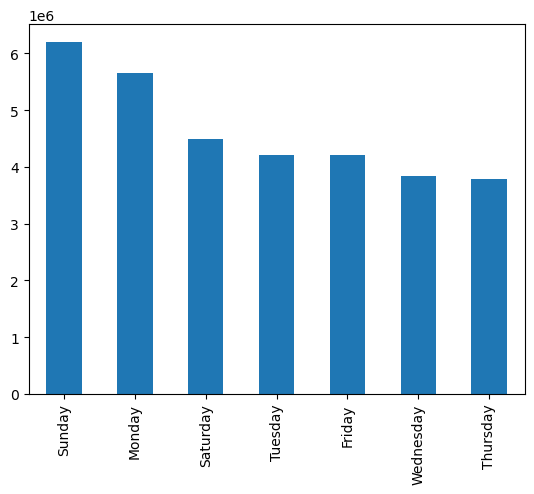

In [4]:
# creating bar charts
df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

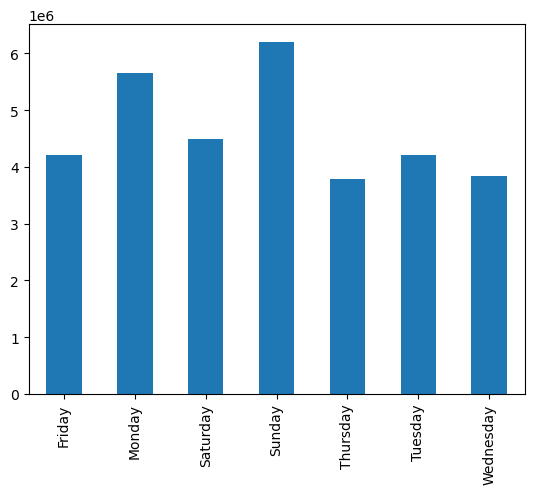

In [5]:
# sorting
bar = df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

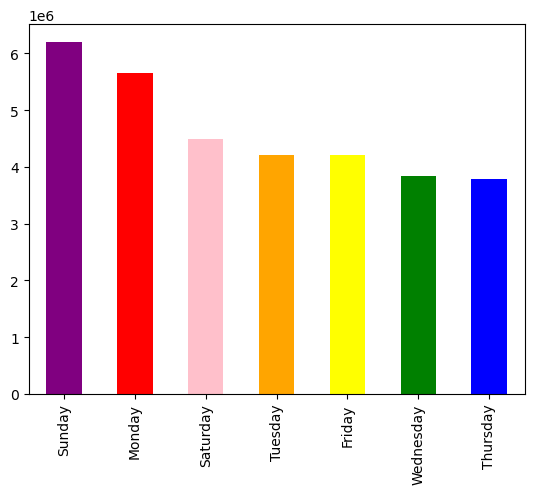

In [6]:
bar = df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

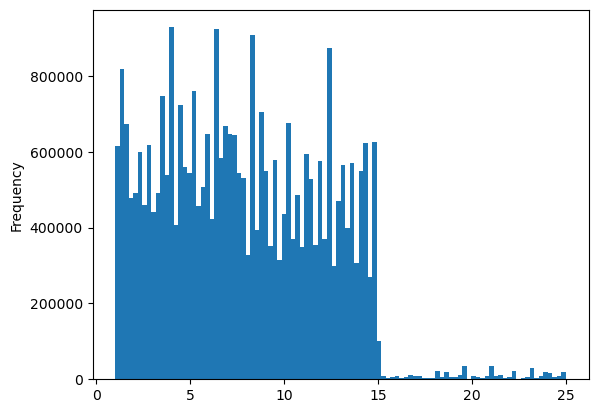

In [8]:
df_ords_prods_merged['prices'].plot.hist(bins = 100)

<AxesSubplot:xlabel='prices', ylabel='prices'>

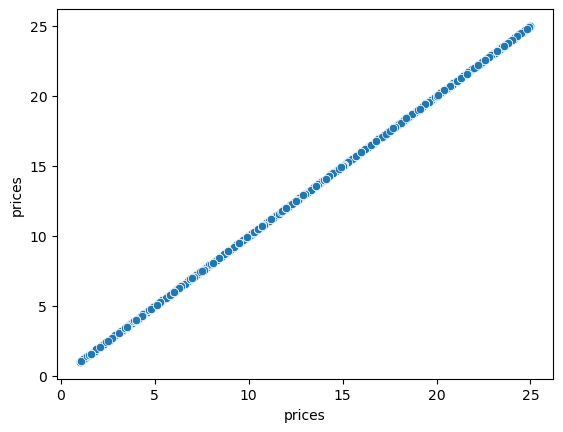

In [9]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merged)

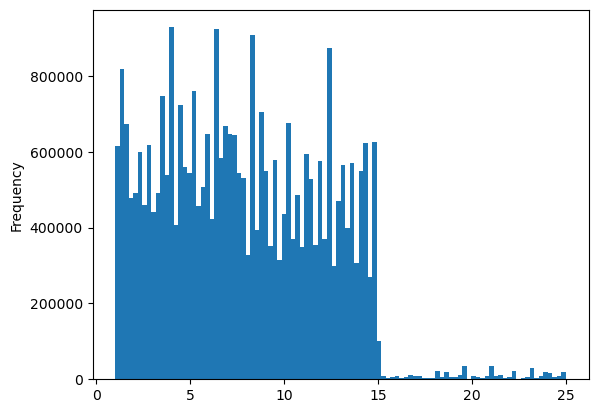

In [10]:
hist = df_ords_prods_merged['prices'].plot.hist(bins = 100)

In [11]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### Sampling Data

In [12]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
big = df_ords_prods_merged[dev]

In [15]:
small = df_ords_prods_merged[~dev]

In [16]:
df_small = small[['orders_day_of_week','prices']]

### Line Charts

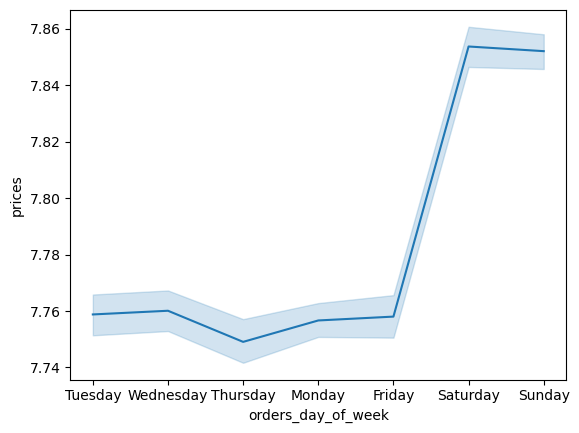

In [17]:
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

### Q3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

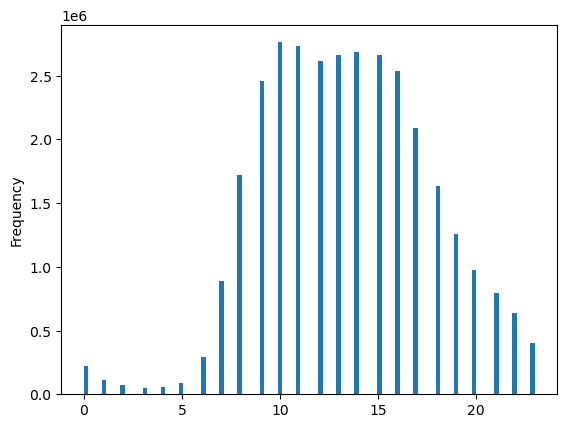

In [18]:
hist_order_hour_of_day = df_ords_prods_merged['order_hour_of_day'].plot.hist(bins = 100)

shows the frequency of orders per hour in the data frame

### Q4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

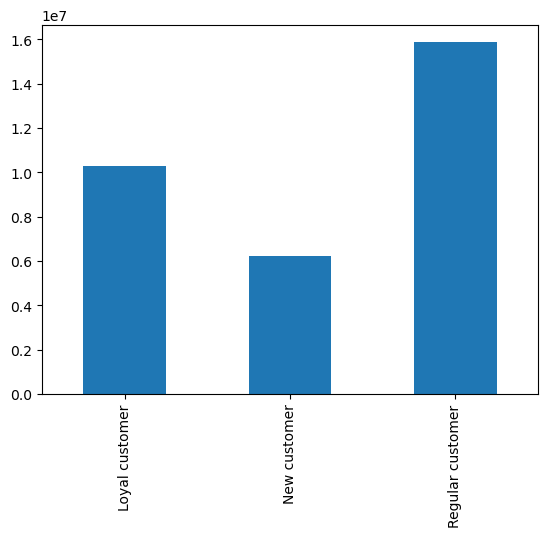

In [19]:
bar_loyalty_flag = df_ords_prods_merged['loyalty_flag'].value_counts().sort_index().plot.bar()

### Q5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [20]:
df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

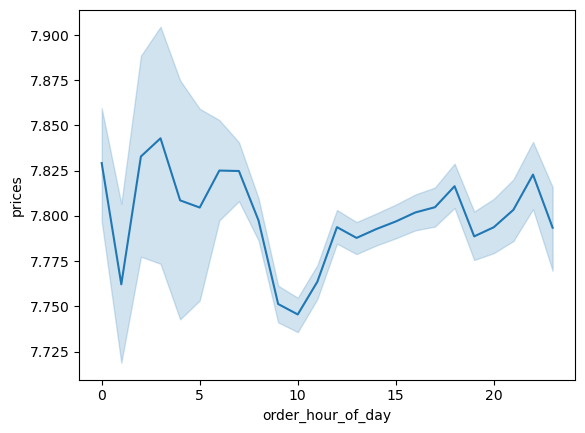

In [21]:
line_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

### Q6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [22]:
df_customers = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'customers.csv'),index_col = False)

In [23]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


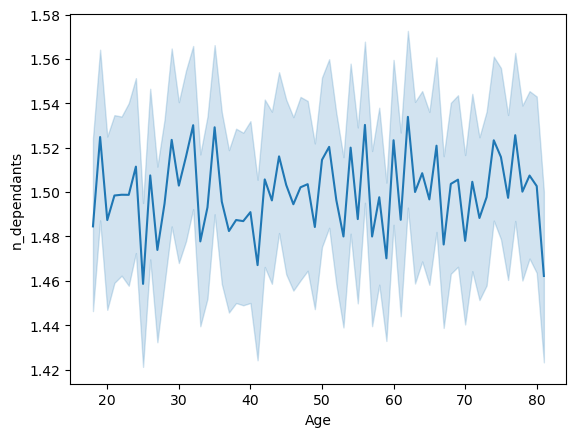

In [24]:
line_age_dependants = sns.lineplot(data = df_customers, x = 'Age',y = 'n_dependants')

Above line chart does not tell us clear information about the connection between age and dependants. 

### Q7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows

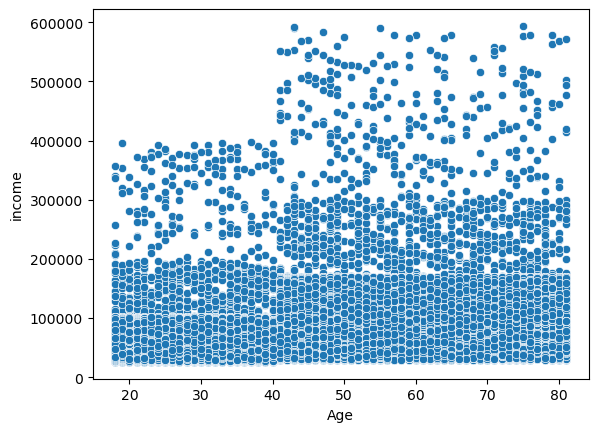

In [25]:
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_customers)

The scatterplot shows that customers are older tha 40 have more spending power however, it seems to be a positive correlation between age and income.

### Q8: Export your visualizations as “.png” files in your relevant project folder.

In [26]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [27]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [28]:
line_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day_prices.png'))

In [29]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [30]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))